Sveučilište u Zagrebu<br>
Fakultet elektrotehnike i računarstva

#Strojno učenje
<a href="http://www.fer.unizg.hr/predmet/su">http://www.fer.unizg.hr/predmet/su</a>

Ak. god. 2015./2016.

#Laboratorijska vježba 1: Procjena parametara i Bayesov klasifikator

(c) 2015 Jan Šnajder

*Verzija 0.3*

Objavljeno: **27. listopada 2015.**<br>
Rok za predaju: **1. studenog 2015.**

Josip Milić 0036456339


Vježba se sastoji od više zadataka grupiranih u tri teme. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg koda te evaluiranja ćelija. Odgovore na pitanja **nemojte pisati** u bilježnicu koju ćete demonstrirati asistentu (kako ih pri predaji ne bi samo čitali).

Molim vas, osigurajte se da u potpunosti **razumijete** kod koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta preinačiti i ponovno evaluirati Vaš kod. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Stoga se nemojte ograničiti samo na to da riješite zadatak, već slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import scipy as sp
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1. Procjena parametara

### 1.1

Definirajte funkciju izglednosti $\mathcal{L}(\mu|\mathcal{D})$ za skup $\mathcal{D}=\{x^{(i)}\}_{i=1}^N$ Bernoullijevih varijabli. Neka od $N$ varijabli njih $m$ ima vrijednost 1 (npr. od $N$ bacanja novčića, $m$ puta smo dobili glavu). Definirajte funkciju izglednosti tako da je parametrizirana s $N$ i $m$, dakle definirajte funkciju $\mathcal{L}(\mu|N,m)$. 

In [2]:
def likelihood(mu, m, N):
    return mu**m * (1 - mu)**(N - m)

### 1.2

Prikažite funkciju $\mathcal{L}(\mu|N,m)$ za (1) $N=10$ i $m=1,2,5,9$ te za (2) $N=100$ i $m=1,10,50,90$ (dva zasebna grafikona).

**Q:** Koja vrijednost odgovara ML-procjenama i zašto?

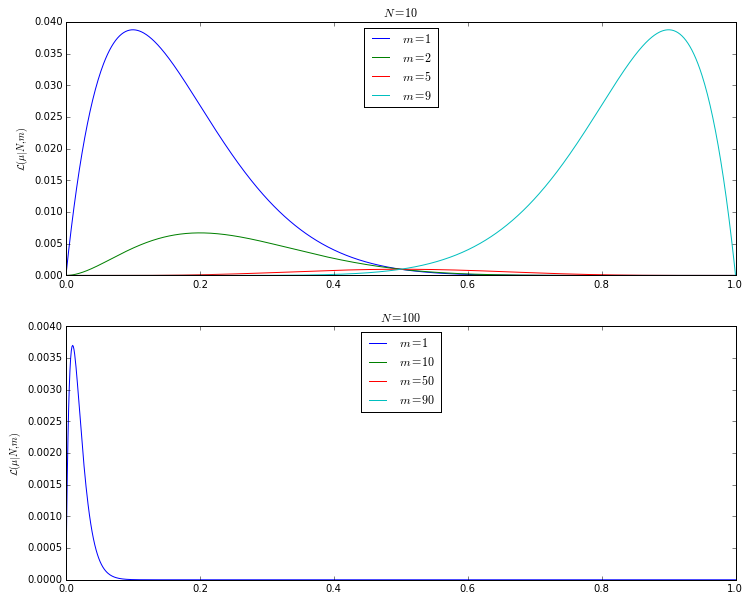

In [3]:
figure, subplots = plt.subplots(2, 1)
figure.set_figheight(10)
figure.set_figwidth(12)
xs = linspace(0,1, 1000)
Ns = [10, 100]
mss = [[1, 2, 5, 9],[1, 10, 50, 90]]
for index, N in zip(range(2), Ns):
    subplot = subplots[index]
    subplot.set_title("$N = %d$" % N)
    for m in mss[index]:
        subplot.plot(xs, likelihood(xs, m, N), label = "$m = %d$" % m)
        subplot.legend()
        subplot.legend(loc = "upper center")
        subplot.set_ylabel("$\mathcal{L}(\mu|N,m)$")
    

plt.show()


### 1.3

Prikažite funkciju $\mathcal{L}(\mu|N,m)$ za $N=10$ i $m=\{0,9\}$.

**Q:** Koja je ML-procjena za $\mu$ i što je problem s takvom procjenom u ovome slučaju?

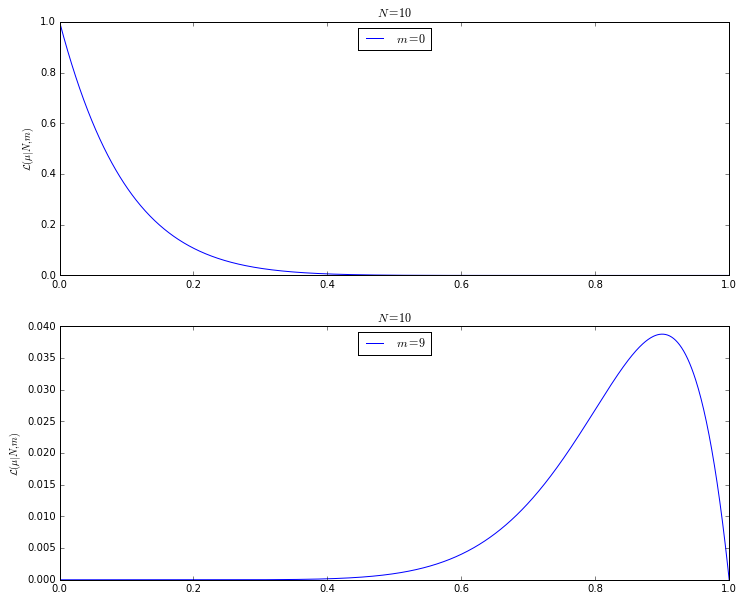

In [5]:
figure, subplots = plt.subplots(2, 1)
figure.set_figheight(10)
figure.set_figwidth(12)
xs = linspace(0,1, 1000)
N = 10
ms = [0,9]
for index, m in zip(range(2),ms):
    subplot = subplots[index]
    subplot.set_title("$N = %d$" % N)
    subplot.plot(xs, likelihood(xs, m, N), label = "$m = %d$" % m)
    subplot.legend()
    subplot.legend(loc = "upper center")
    subplot.set_ylabel("$\mathcal{L}(\mu|N,m)$")
    

plt.show()



### 1.4

Prikažite beta-distribuciju $B(\mu|\alpha,\beta)$ za različite kombinacije parametara $\alpha$ i $\beta$, uključivo $\alpha=\beta=1$ te $\alpha=\beta=2$.

**Q:** Koje parametere biste odabrali za modeliranje apriornog znanja o parametru $\mu$ za novčić za koji mislite da je "donekle pravedan, ali malo češće pada na glavu"? Koje biste parametre odabrali za novčić za koji držite da je posve pravedan? Zašto uopće koristimo beta-distribuciju, a ne neku drugu?

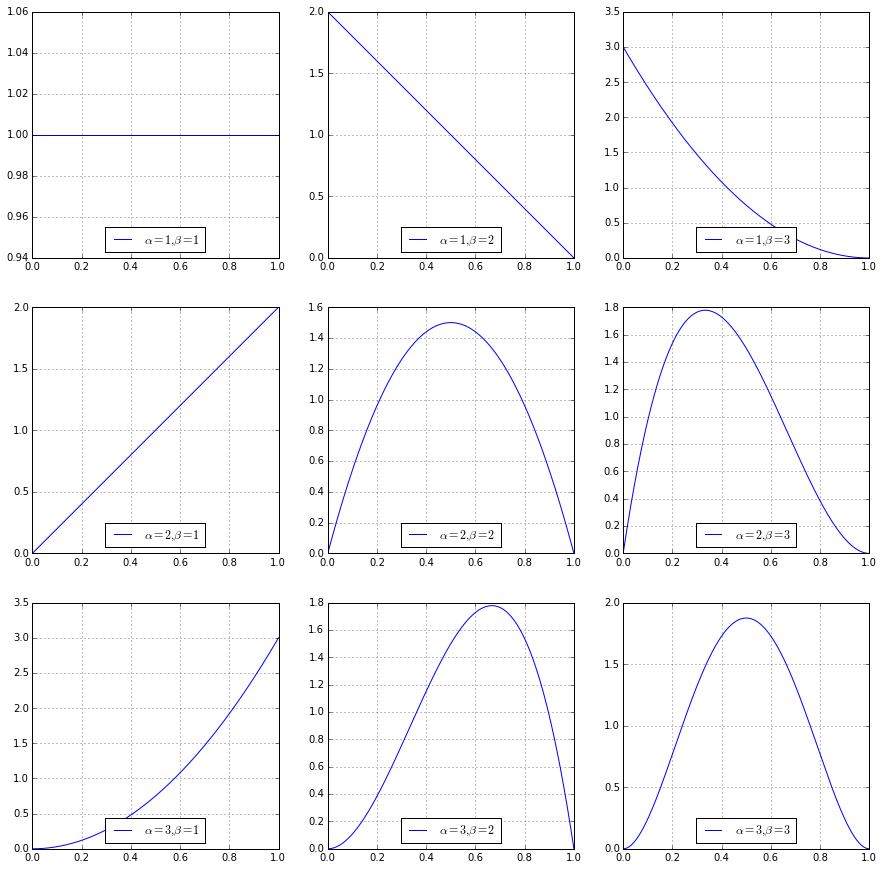

In [6]:
from scipy import stats

xs = linspace(0,1, 1000)

figure, subplots = plt.subplots(3, 3)
figure.set_figheight(15)
figure.set_figwidth(15)
r = 0
c = 0
for alpha in range(1,4):
    for beta in range (1, 4):
        subplot = subplots[r, c]
        c += 1
        if (c == 3):
            c = 0
            r += 1
        subplot.plot(xs, stats.beta.pdf(xs, alpha, beta), label = "$\\alpha = %d , \\beta = %d$ " % (alpha, beta))
        subplot.legend()
        subplot.legend(loc = "lower center")
        subplot.grid()
        
plt.show()

### 1.5

Definirajte funkciju za izračun zajedničke vjerojatnosti $P(\mu,\mathcal{D}) = P(\mathcal{D}|\mu) \cdot P(\mu|\alpha,\beta)$ te prikažite tu funkciju za gornje kombinacije parametara $N$ i $m$ i neke odabrane $\alpha$ i $\beta$. 

***Q***: Koje vrijednosti odgovaraju MAP-procjeni za $\mu$? Usporedite ih sa ML-procjenama.

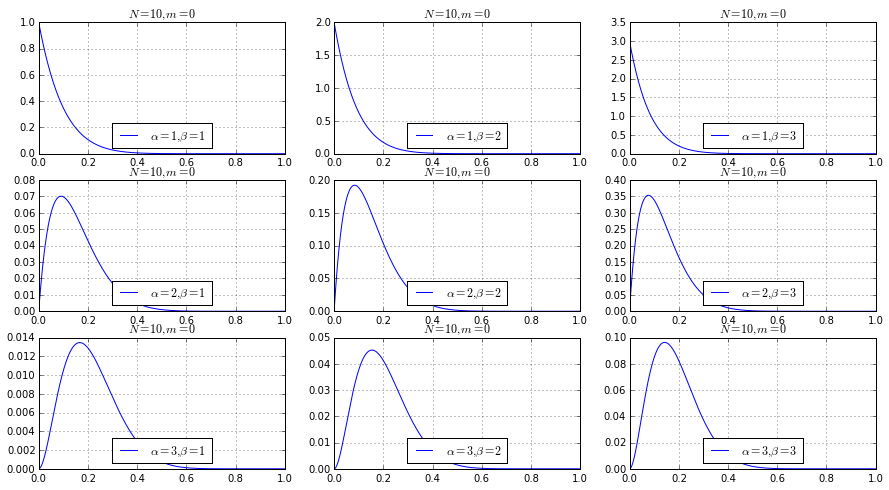

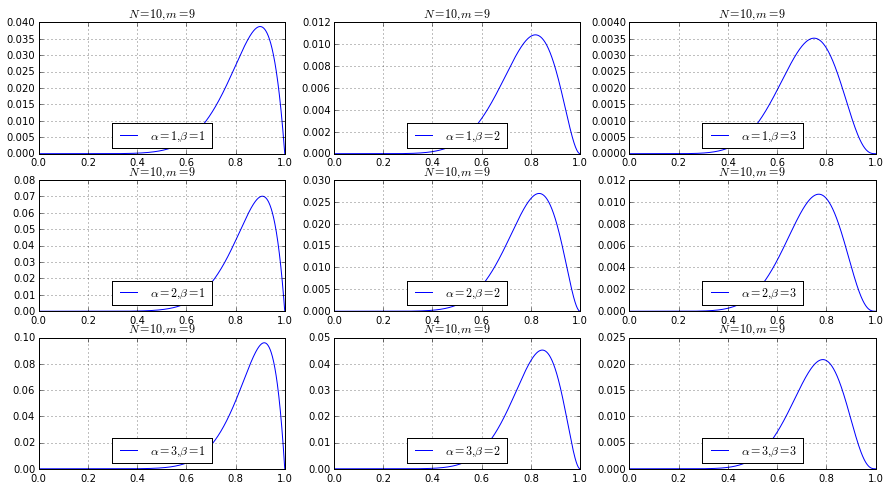

In [7]:
def joint(mu, m, N, alpha, beta):
    return likelihood(mu, m, N) *stats.beta.pdf(mu, alpha, beta)

xs = linspace(0,1, 1000)

def show_graphs(xs, N, m, alphas, betas):
    figure, subplots = plt.subplots(len(alphas), len(betas))
    figure.set_figheight(8)
    figure.set_figwidth(15)
    r = 0
    c = 0
    for alpha in alphas:
        for beta in betas:
            subplot = subplots[r, c]
            c += 1
            if (c == len(betas)):
                c = 0
                r += 1
            subplot.plot(xs, joint(xs, m, N, alpha, beta), label = "$\\alpha = %d , \\beta = %d$ " % (alpha, beta))
            subplot.set_title("$N = %d , m = %d$" % (N, m))
            subplot.legend()
            subplot.legend(loc = "lower center")
            subplot.grid()
    plt.show()

alpha_max = 3
beta_max = 3
N = 10
ms = [0,9]
for m in ms:
    show_graphs(xs, N, m, range(1,alpha_max + 1), range(1, beta_max + 1))
    print "\n\n"


### 1.6

Za $N=10$ i $m=1$, na jednome grafikonu prikažite sve tri distribucije: $P(\mu,\mathcal{D})$, $P(\mu|\alpha,\beta)$ i $\mathcal{L}(\mu|\mathcal{D})$.

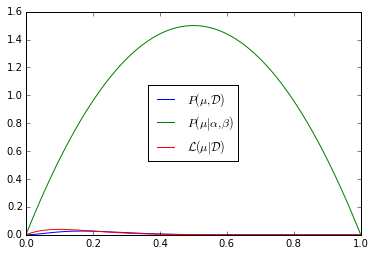

In [8]:
xs = linspace(0,1, 1000)
m = 1
N = 10
alpha = 2
beta = 2
plt.plot(xs, joint(xs, m, N, alpha, beta), label = "$P(\mu,\mathcal{D})$")
plt.plot(xs, stats.beta.pdf(xs, alpha, beta), label = "$P(\mu|\\alpha,\\beta)$")
plt.plot(xs, likelihood(xs, m, N), label = "$\mathcal{L}(\mu|\mathcal{D})$")
plt.legend(loc = "center")

plt.show()

### 1.7

Pročitajte [ove](http://scikit-learn.org/stable/datasets/) upute o učitavanju oglednih skupova podataka u SciPy. Učitajte skup podataka *Iris*. Taj skup sadrži $n=4$ značajke i $K=3$ klase. Odaberite jednu klasu i odaberite sve primjere iz te klase, dok ostale primjere zanemarite (u nastavku radite samo s primjerima iz te jedne klase). Vizualizirajte podatke tako da načinite 2D-prikaze za svaki par značajki (šest grafikona; za prikaz je najjednostavnije koristiti funkciju [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter)).

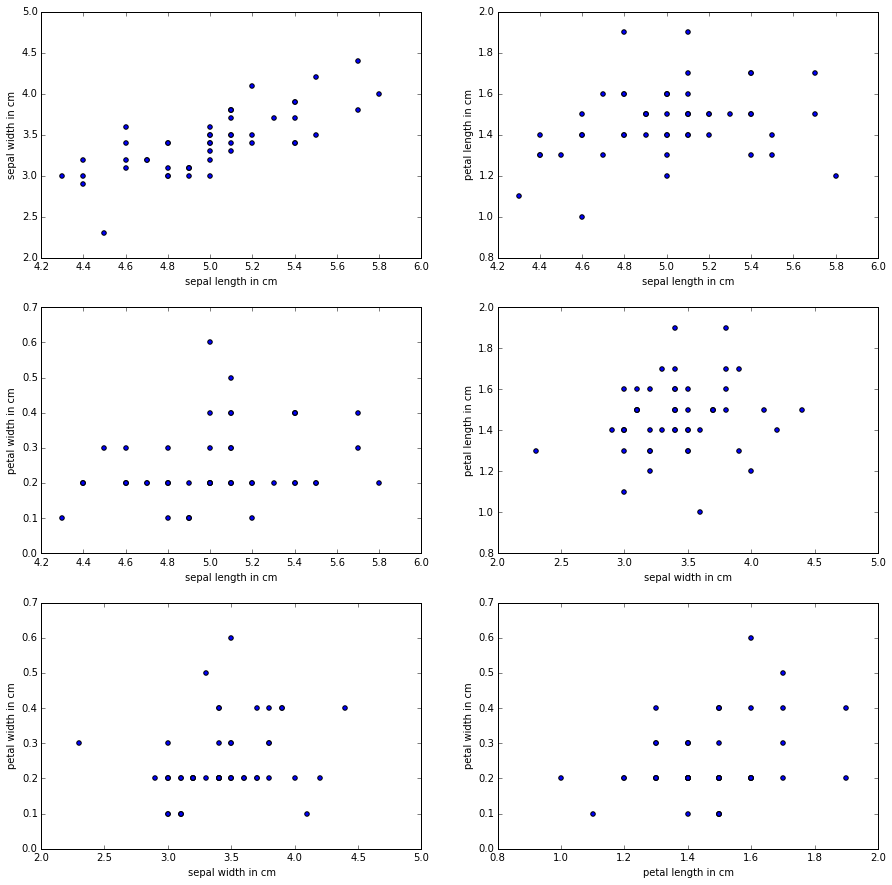

In [9]:
from sklearn import datasets
iris = datasets.load_iris()
setosa = iris.data[iris.target == 0]
feature_names = iris['DESCR'].split('\n        - ')[1:5]

figure, subplots = plt.subplots(3, 2)
figure.set_figheight(15)
figure.set_figwidth(15)
r = 0
c = 0
for i in range(4):
    for j in range (i+1, 4):
        first = setosa[:, i]
        second = setosa[:, j]
        subplot = subplots[r, c]
        c += 1
        if (c == 2):
            c = 0
            r += 1
        subplot.scatter(first, second)
        #subplot.set_xlim(0, 7)
        #subplot.set_ylim(0, 5)
        subplot.set_xlabel(feature_names[i])
        subplot.set_ylabel(feature_names[j])
plt.show()
    



### 1.8

Pogledajte opis modul [`stats`](http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) te proučite funkciju [`norm`](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.norm.html#scipy.stats.norm). Implementirajte funkciju log-izglednosti za parametre $\mu$ i $\sigma^2$ normalne distribucije.

Funkcija log-izglednosti za parametre $\mu$ i $\sigma^2$:
\begin{align*}
\ln\mathcal{L}(\mu,\sigma^2 | \mathcal{D}) &= 
\ln\prod_{i=1}^N
 \frac{1}{\sqrt{2\pi}\sigma}\exp\Big\{-\frac{(x^{(i)}-\mu)^2}{2\sigma^2}\Big\} \\
&= -\frac{N}{2}\ln(2\pi) 
  - N\ln\sigma 
  - \frac{\sum_i(x^{(i)}-\mu)^2}{2\sigma^2}\\
\end{align*}

In [10]:
import scipy.stats as stats

def sum_diff(X, mu):
    s = 0
    for x in X:
        s += (x - mu)**2
    return s
    
def log_likelihood(X, mu, sigma, N):
    return -N/float(2)*sp.log(2*sp.pi) - N*sp.log(sigma) - sum_diff(X, mu)/(2*sigma**2)



### 1.9

Izračunajte ML-procjene za $(\mu, \sigma^2)$ za svaku od $n=4$ značajki iz skupa *Iris*. Ispišite log-izglednosti tih ML-procjena. 

**Q:** Možete li, na temelju dobivenih log-izglednosti, zaključiti koja se značajka najbolje pokorava normalnoj distribuciji? 

\begin{align*}
\nabla\ln\mathcal{L}(\mu,\sigma^2 | \mathcal{D})&=0\\
\vdots\\
\hat{\mu}_\mathrm{ML} &= \frac{1}{N}\sum_{i=1}^N x^{(i)}\\
\hat{\sigma}^2_\mathrm{ML} &= \frac{1}{N}\sum_{i=1}^N(x^{(i)}-\hat{\mu}_\mathrm{ML})^2
\end{align*}


In [28]:
def calc_mu_ml(X):
    return float(sum(X)) / len(X)
def calc_sigma_mlsq(X):
    N = len(X)
    mu_ml = calc_mu_ml(X)
    sigma_mlsq = 0.0
    for x in X:
        sigma_mlsq += 1.0 / N * (x - mu_ml)**2
    return sigma_mlsq

for index in range(4):
    features = setosa[:, index]
    N = len(features)
    mu_ml = calc_mu_ml(features)
    sigma_mlsq = calc_sigma_mlsq(features)
    sigma_ml = sp.sqrt(sigma_mlsq)
    print "sigma_mlsq", sigma_mlsq
    print "mu_ml", mu_ml
    print "Log-izglednost za značajku '" + feature_names[index] + "': %f" % log_likelihood(features, mu_ml, sigma_ml, N)


sigma_mlsq 0.121764
mu_ml 5.006
Log-izglednost za značajku 'sepal length in cm': -18.305163
sigma_mlsq 0.142276
mu_ml 3.418
Log-izglednost za značajku 'sepal width in cm': -22.197266
sigma_mlsq 0.029504
mu_ml 1.464
Log-izglednost za značajku 'petal length in cm': 17.133809
sigma_mlsq 0.011264
mu_ml 0.244
Log-izglednost za značajku 'petal width in cm': 41.206660


### 1.10

Proučite funkciju [`pearsonr`](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.pearsonr.html) za izračun Pearsonovog koeficijenta korelacije. Izračunajte koeficijente korelacije između svih četiri značajki u skupu *Iris*. 

In [12]:
print "Pearsonovi koeficijenti korelacije:"
for i in range(4):
    for j in range (i+1, 4):
        first = setosa[:, i]
        second = setosa[:, j]
        print "'"+feature_names[i]+"'", 'i', "'"+feature_names[j]+"':", '\t', stats.pearsonr(first, second)
        

Pearsonovi koeficijenti korelacije:
'sepal length in cm' i 'sepal width in cm': 	(0.74678037326392677, 4.7519865801489567e-10)
'sepal length in cm' i 'petal length in cm': 	(0.26387409291868696, 0.06407651344005677)
'sepal length in cm' i 'petal width in cm': 	(0.27909157499959675, 0.049674661994385173)
'sepal width in cm' i 'petal length in cm': 	(0.17669462869680694, 0.2196331973439051)
'sepal width in cm' i 'petal width in cm': 	(0.27997288851690449, 0.048928652533839836)
'petal length in cm' i 'petal width in cm': 	(0.30630821115803558, 0.030507161205929209)


### 1.11

Proučite funkciju [`cov`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.cov.html) te izračunajte ML-procjenu za kovarijacijsku matricu za skup *Iris*. Usporedite pristranu i nepristranu procjenu. Pokažite da se razlika smanjuje s brojem primjera (npr. isprobajte za $N/4$ i $N/2$ i $N$ primjera).

In [13]:
classes = [iris.data[iris.target == 0],iris.data[iris.target == 1],iris.data[iris.target == 2]]
N = len(classes[0])
div = 4
while (div >= 1):
    classes_part = iris.data[:N / div, :]
    mean_mle = sp.mean(classes_part, axis=0)
    s = 0
    for x in iris.data:
        s += sp.outer(x - mean_mle, x - mean_mle)
    cov_mle = s / len(classes_part)
    print "N = %d" % (N / div)
    print cov_mle
    div /= 2

    

N = 12
[[  19.6375       -3.97791667   42.84138889   17.99763889]
 [  -3.97791667    3.42958333  -12.475        -5.09833333]
 [  42.84138889  -12.475       104.32111111   44.23111111]
 [  17.99763889   -5.09833333   44.23111111   19.28569444]]
N = 25
[[  8.075344  -2.318032  18.836224   7.731408]
 [ -2.318032   2.20936   -7.7928    -3.133072]
 [ 18.836224  -7.7928    50.25776   20.838064]
 [  7.731408  -3.133072  20.838064   8.893792]]
N = 50
[[  4.146748  -1.031388   9.559776   3.938496]
 [ -1.031388   0.95774   -3.46448   -1.39408 ]
 [  9.559776  -3.46448   25.07376   10.43516 ]
 [  3.938496  -1.39408   10.43516    4.46976 ]]


### 1.12

Proučite funkciju [`multivariate_normal`](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal). Definirajte funkciju koja vraća funkciju gustoće $P(x_1,x_2)$ za odabrane dvije značajke. Nacrtajte grafikone kontura (funkcija [`contour`](https://scipy-lectures.github.io/intro/matplotlib/matplotlib.html#contour-plots)) za svih šest parova značajki.

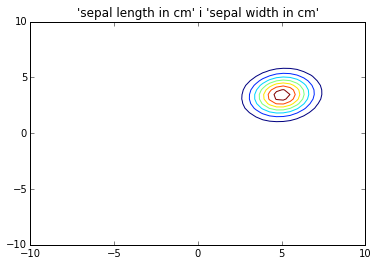

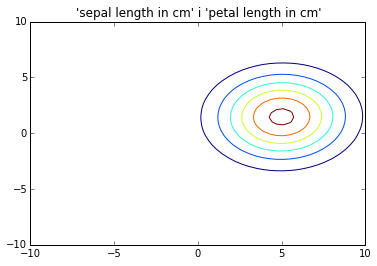

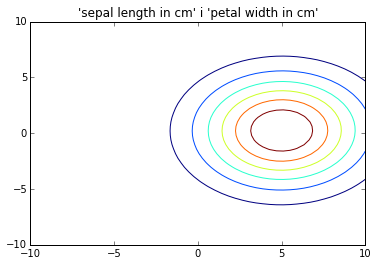

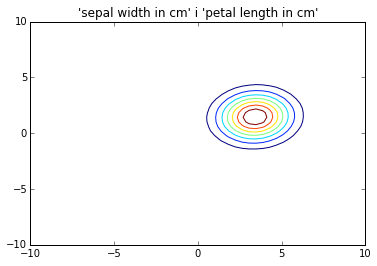

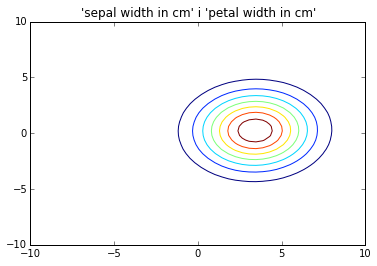

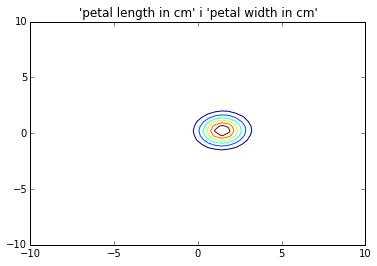

In [14]:
def density (X1 , X2, i, j):
    mean_mle = [sp.mean(X1, axis=0),sp.mean(X2, axis=0)];
    data = sp.hstack([X1,X2]);
    cov_mle = 0
    s = 0
    for x in data:
        s += sp.outer(x - mean_mle, x - mean_mle)
    cov_mle = s / len(data)
    
    p_mle = stats.multivariate_normal(mean_mle, cov_mle)
    x = np.linspace(-10, 10)
    y = np.linspace(-10, 10)
    X, Y = np.meshgrid(x, y)
    XY = np.dstack((X,Y))
    plt.contour(X, Y, p_mle.pdf(XY));
    plt.title("'%s' i '%s'" % (feature_names[i], feature_names[j]))
    plt.show()

for i in range(4):
    for j in range (i+1, 4):
        density(setosa[:, i], setosa[:, j], i, j)
        

# 2. Bayesov klasifikator za diskretne značajke

### 2.1

Za demonstraciju rada Bayesovog klasifikatora sa diskretnim značajkama treba nam skup primjera sa diskretnim značajkama i oznakama klase. Jedan takav ogledni skup podataka jest *digits*:

In [15]:
from sklearn.datasets import load_digits
digits = load_digits()

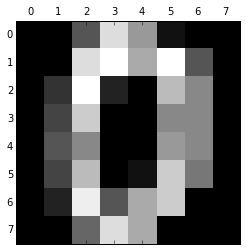

In [16]:
gray() 
matshow(digits.images[0])
show();

Svaki primjer je matrica dimenzija $8\times 8$:

In [17]:
shape(digits.images[0])

(8L, 8L)

In [18]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

Ako na ovom skupu želimo trenirati Bernoullijev naivni Bayesov klasifikator, značajke trebamo binarizirati. Proučite funkciju [`binarize`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.binarize.html) i binarizirajte skup podataka.

Na binariziranom skupu podataka možemo trenirati naš model. Naravno, da bismo mogli ispitati koliko dobro model radi, trebamo izdvojiti dio skupa za ispitivanje. Načinite podjelu skupa na 70% primjera za učenje i 30% primjera za ispitivanje.

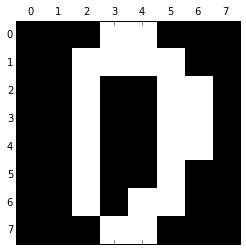

In [19]:
import sklearn.preprocessing as spp
image = digits.images[0]
binarized = spp.binarize(image, threshold=7.0);
perc = 0.7
dim = len(image)
D_border = int(math.ceil(perc * dim))
D = binarized[:D_border,:];
T = binarized[D_border:dim,:];
gray() 
matshow(binarized)
show();

### 2.2

Pročitajte opis modula [`naive_bayes`](http://scikit-learn.org/stable/modules/naive_bayes.html). Za klasifikaciju primjera s diskretnim značajkama treba nam tzv. *Bernoullijev naivni Bayes*, implementiran funkcijom [`BernoulliNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB]). Proučite tu funkciju. Trenirajte model na skupu *digits* (na skupu za treniranje).

In [20]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB(fit_prior=False);
nb.fit(D,digits.target[:len(D)])
print "Predikcija:\t", nb.predict(D)
print "Stvarno:\t", digits.target[:D_border]


Predikcija:	[0 1 2 2 2 5]
Stvarno:	[0 1 2 3 4 5]


### 2.3

Proučite modul [`metric`](http://scikit-learn.org/stable/modules/model_evaluation.html#prediction-error-metrics) za vrednovanje modela. Izračunajte točnost modela (mjera *Accuracy*) na skupu za treniranje i na skupu za ispitivanje.

**Q:** Je li odnos između tih dviju pogrešaka očekivan? Zašto?

In [21]:
from sklearn.metrics import accuracy_score
accuracy_D = accuracy_score(nb.predict(D), digits.target[:D_border]);
accuracy_T = accuracy_score(nb.predict(T), digits.target[D_border:dim]);

print "Točnost modela na skupu za učenje D:\t\t", round(accuracy_D, 3)
print "Točnost modela na skupu za ispitivanje T:\t", accuracy_T

Točnost modela na skupu za učenje D:		0.667
Točnost modela na skupu za ispitivanje T:	0.0


### 2.4

Trenirajte model bez zaglađivanja te izračunajte točnost takvog modela.

**Q:** U čemu je problem?

In [22]:
nb = BernoulliNB(fit_prior=False, alpha = 0);
nb.fit(D,digits.target[:D_border]),

accuracy_D = accuracy_score(nb.predict(D), digits.target[:D_border]);
accuracy_T = accuracy_score(nb.predict(T), digits.target[D_border:dim]);

print "Predikcija:\t", nb.predict(D)
print "Stvarno:\t", digits.target[:D_border]

print "Točnost modela na skupu za učenje D:\t\t", round(accuracy_D, 3)
print "Točnost modela na skupu za ispitivanje T:\t", accuracy_T

Predikcija:	[0 0 0 0 0 0]
Stvarno:	[0 1 2 3 4 5]
Točnost modela na skupu za učenje D:		0.167
Točnost modela na skupu za ispitivanje T:	0.0


C:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:707: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
C:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:726: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))


### 2.5

Općenito govoreći, što više primjera za učenje imamo na raspolaganju, to ćemo moći trenirati bolji model. Međutim, za svaki problem i svaki model postoji određen broj primjera nakon kojeg daljnje povećavanje skupa za učenje ne donosi velike dobitke. Uvid u to možemo dobiti skiciranjem krivulje učenja (engl. *learning curve*). Proučite funkciju [`learning_curve`](http://scikit-learn.org/stable/modules/generated/sklearn.learning_curve.learning_curve.html#sklearn.learning_curve.learning_curve) (ili sami implementirajte takvu funkciju) te prikažite krivulju učenja naivnog Bayesovog klasifikatora na skupu *digits*.

**Q:** Bi li koristilo da imamo veći skup primjera za učenje? Koliko veći?

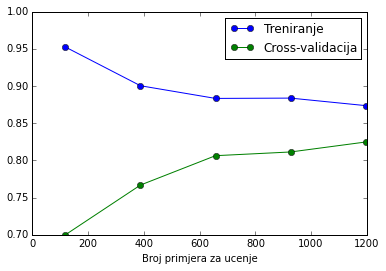

In [23]:
from sklearn import cross_validation
from sklearn.learning_curve import learning_curve


digits = load_digits();
estimator = BernoulliNB();
train_sizes, train_scores, test_scores = learning_curve(estimator,digits.data,digits.target,np.linspace(0.1, 1.0, 5))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-',
             label="Treniranje")
plt.plot(train_sizes, test_scores_mean, 'o-',
             label="Cross-validacija")
plt.legend(loc = "upper right")
plt.xlabel("Broj primjera za ucenje")
plt.show()

###2.6

<p style="color:red">
**TBD**
</p>

## 3. Bayesov klasifikator za kontinuirane značajke

### 3.1

Učitajte skup podataka *Iris* i podijelite ga skup za učenje i skup za provjeru u omjeru 70:30.

In [24]:
iris = datasets.load_iris()
iris_data = iris.data
iris_target = iris.target
perc = 0.7
dim = len(iris_data)
D_border = int(math.ceil(perc * dim))
D = iris_data[:D_border]
T = iris_data[D_border:]

### 3.2

Proučite klasu [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) koja implementira naivan Bayesov klasifikator za kontinuirane značajke. Trenirajte model na skupu za učenje *Iris* i vrednujte njegovu točnost na skupu za ispitivanje.

In [25]:
from sklearn.naive_bayes import GaussianNB

D_target = iris_target[:D_border]
T_target = iris_target[D_border:]

gnb = GaussianNB();
gnb.fit(D, D_target);

print "Predikcija:\t", gnb.predict(T)
print "Stvarno:\t", T_target

accuracy_T = accuracy_score(gnb.predict(T) , T_target);
print "Točnost modela na skupu za ispitivanje T:", round(accuracy_T, 3)

Predikcija:	[2 1 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2
 2 2 2 2 1 2 2 2]
Stvarno:	[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
Točnost modela na skupu za ispitivanje T: 0.778


### 3.3

Naivan Bayesov klasifikator u potpunosti zanemaruje korelacije između varijabli. Postavlja se pitanje bi li klasifikator na skupu *Iris* dosezao veću točnost kada bi modelirao (linearne) zavisnosti između varijabli.

Implementirajte Bayesov klasifikator s punom kovarijacijskom matricom za svaku klasu (dakle: nedijeljenom i nedijagonalnom kovarijacijskom matricom). Implementacija se sastoji od dvije funkcije: `train_GB` i `predict_GB`. Funkcija `train_GB(X,y)` neka trenira model Bayesovog klasifikatora sa Gaussovim gustoćama vjerojatnosti i vraća trenirani model. Za procjenu vektora srednjih vrijednosti $\mu_j$ i kovarijacijskih matrica $\Sigma_j$ možete koristiti [ove](http://docs.scipy.org/doc/numpy/reference/routines.statistics.html) funkcije. Funkcija `predict_GB(model,X)` neka daje predikcije modela na svim primjerima iz `X`. Alternativno, model možete implementirati kao klasu, a funkcije `train_GB` i `predict_GB` kao njezine metode. Izračunajte točnost modela na ispitnome dijelu skupa *Iris*.

In [26]:
def train_GB(X,y):
    likelihoods = []
    for i in range(3):
        array = X[y == i]
        mu = np.mean(array , axis = 0)
        X2 = np.vstack((array[:,0],array[:,1],array[:,2],array[:,3]))
        cov =np.cov(X2)  
        likelihoods.append([mu, cov])
    return likelihoods

def predict_GB(model,X):
    results = []
    for index in range(len(X)):
        array = X[index,:]
        probs = [stats.multivariate_normal.pdf(array, mean=model[0][0], cov=model[0][1]),
        stats.multivariate_normal.pdf(array, mean=model[1][0], cov=model[1][1]),
        stats.multivariate_normal.pdf(array, mean=model[2][0], cov=model[2][1])]
        result = probs.index(max(probs))
        results = np.append(results,result)
    return results

model = train_GB(iris_data , iris_target)
predicted = predict_GB(model,T)

print "Predikcija:\t", predicted
print "Stvarno:\t", T_target

accuracy_T = accuracy_score(predicted , T_target)
print "Točnost modela na skupu za ispitivanje T:", round(accuracy_T, 5)

Predikcija:	[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  1.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.]
Stvarno:	[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
Točnost modela na skupu za ispitivanje T: 0.97778
